<a href="https://colab.research.google.com/github/shekharkhandelwal1983/DLforDataArchitects/blob/main/notebooks/chapter8/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import urllib.request


In [9]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
file = urllib.request.urlopen(url)

data = pd.read_csv(file, usecols=[1], engine='python')


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [11]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]


In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [13]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [14]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
92/92 - 2s - loss: 0.0139 - 2s/epoch - 24ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0062 - 263ms/epoch - 3ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0056 - 261ms/epoch - 3ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0052 - 266ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0048 - 271ms/epoch - 3ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0046 - 250ms/epoch - 3ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0044 - 270ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0043 - 279ms/epoch - 3ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0042 - 251ms/epoch - 3ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0041 - 247ms/epoch - 3ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0042 - 269ms/epoch - 3ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0039 - 259ms/epoch - 3ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0039 - 254ms/epoch - 3ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0040 - 261ms/epoch - 3ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0038 - 269ms/epoch - 3ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0038 - 257ms/epoc

In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


2/2 [==============================] - 0s 6ms/step


In [16]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Test Score: {testScore:.2f} RMSE')


Train Score: 22.37 RMSE
Test Score: 44.75 RMSE


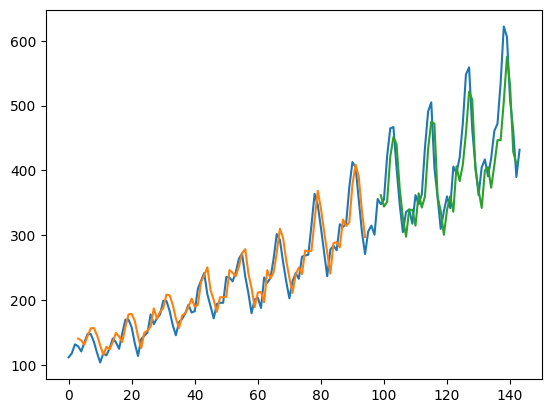

In [17]:
plt.plot(scaler.inverse_transform(data))
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
